<a href="https://colab.research.google.com/github/Ash-Stat/An-Si-Hyun/blob/data/%EC%82%AC%EC%A7%84%EB%B6%84%EB%A5%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#데이터 불러오기셋
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [6]:
X,y=mnist['data'],mnist['target']
X.shape
# 28팍셀 * 28픽셀 = 784 이고, 70,000개의 이미지가 있다.

(70000, 784)

In [12]:
y.shape

(70000,)

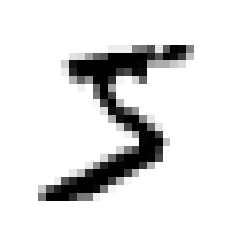

실제 레이블 : 5


In [16]:
import matplotlib.pyplot as plt
some_digit=X[0]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap='binary')
plt.axis('off')
plt.show()
print('실제 레이블 :',y[0])

In [18]:
#레이블이 문자열로 되어있으므로 수치형으로 변환한다.

y=y.astype(float)

In [19]:
#mnist 데이터셋은 이미 훈련과 테스트셋으로 나누어 놓았다.

X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [20]:
#문제를 단순화 하여 하나의 숫자, 예컨대 숫자 5만 식별을 해보도록 한다.

#즉, 5인가? 아닌가 처럼 두 개의 클래스를 구분할 수 있는 이진 분류기의 한 예시인 것이다.

y_train_5=(y_train==5) #5는 True반환, 나머지는 죄다 False 반환
y_test_5=(y_test==5)


In [22]:
#모델중 사이킷런의 SGDClassifier 클래스를 사용한다.
#그래서 확률적 경사 하강법 분류기로 시작을 해본다.
#이 분류기는 매우 큰 데이터셋을 효율적으로 처리하는 장점을 지니고 있다.(한번에 하나씩 훈련샘플을 독립적으로 처리하기 때문)
##그래서 인지 온라인 학습에 아주 걸맞다.
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
#SGDClassifier는 훈련하는 데 무작위성을 사용한다( 그래서 결과를 재현하고 싶다면 random_state 매개변수를 저장해야 한다.)
sgd_clf.predict([some_digit]) #[]을 붙혀주자.

#이 분류기에서는 5를 5라고 판별 하였다.

array([ True])

In [26]:
#사이킷런 교차검증
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train,y_train_5, cv=3,scoring='accuracy')

#모든 교차검증 폴드에 대해 정확도가 95%이상이다.
#하지만 불균형한 데이터(어떤 클래스가 다른 것보다 월등히 많을 경우)에는
#정확도를 성능지표로 활용하는 것이 선호되지 않는다.

array([0.95035, 0.96035, 0.9604 ])

In [27]:
#분류기의 성능을 평가하는 더 좋은 방법은 오차행렬(confusiong matrix)을 조사하는 것이다.
#기본적인 아이디어는 예를들어 A샘플이 B로 분류된 횟수를 세는 것 이다.
#예를 들어 분류기가 숫자 5의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 오차 행렬의 5행 3열을 살펴보면 된다.

#오차행렬을 만들기 위해서 먼저 실제 타깃과 비교할 수 있도록 예측값을 만들어야 한다.
#테스트 세트로 예측을 만들 수 있지만 여기서 사용하면 안된다.(테스트세트는 분류기가 출시 준비를 다 마친후 프로젝트의 맨 마지막에 사용된다.)
#대신 cross_val_predict()

from sklearn.model_selection import cross_val_predict #평가 점수를 반환하지 않고 각 테스트폴드에서 얻은 예측결과를 반환한다.
y_train_pred=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)
#이때 cross_val_predict() 함수는 k-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다.
#즉, 훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게된다.
#이때 깨끗한 예측은 모델이 훈련하는 동안 보지 못했던 데이터에 대해 예측했다는 뜻이다.

In [28]:
#confusion_matrix() 함수를 사용해 오차 행렬을 만들 준비
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

#오차행렬의 행은 실제 클래스를 나타내고, 열은 예측한 클래스를 나타낸다.
#첫 번째 행은 '5 아님' 이미지(음성 클래스)에 대한 것이다.
#53,892개를 '5아님'으로 정확하게 분류했다.(진짜 음성)
#나머지 687개를 '5'라고 잘못 분류 했다.(거짓 양성)

#두 번째 행은 '5'이미지(양성 클래스)에 대한 것으로, 1,891개를 '5아님'으로 잘못 분류했고(거짓 음성)
#나머지 3,530개를 정확히 '5'라고 분류 했다( 진짜 양성)

array([[53892,   687],
       [ 1891,  3530]])

In [30]:
#많은 요약된 지표중 하나인 양성 예측의 정확도를 살펴보자.

#이를 분류기의 '정밀도(precision)'이라고도 부른다.

#정밀도 = TP/(TP+FP)

#TP는 진짜 양성의 수이고, FP는 거짓 양성의 수이다.

#정밀도는 재현율 이라는 또 다른 지표와 같이 사용하는 것이 일반적이다.

#재현율은 분류기가 정확하게 감지한 양성 샘플의 비율이다.

#이를 민감도, 또는 진짜 양성 비율이라고 부른다.

#재현율 =TP/(TP+FN) ,FN은 거짓 음성의 수이다.

import pandas as pd
pd.DataFrame({'음성' : ['TN','FN'], '양성' : ['FP','TP']},index=['음성','양성'])
#오차행렬에 대한 정리표

,음성,양성
음성,TN,FP
양성,FN,TP


In [34]:
#정밀도와 재현율

#사이킷런은 정밀도와 재현율을 포함하여 분류기의 지표를 계산하는 여러 함수를 제공한다.

from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)
#정밀도는 83% 즉, 진짜 양성 + 거짓 양성중에서 진짜 양성이 나타날 확률이 83%(5라고 판별된)

#5라고 판별된거 중에서 진짜 5는 83%이다.

0.8370879772350012

In [35]:
recall_score(y_train_5,y_train_pred)
#재현율은 65% 즉, 진짜 양성 + 거짓 음성 중에서 진짜 양성이 차지하는 비율이 65%이다.

#진짜 5이미지들 중에서 5라고 분류된게 65%이다.

0.6511713705958311

In [36]:
#정밀도와 재현율을 F1이라고 하는 하나의 숫자로 만들면 편리할 때가 많다.

#F1점수는 정밀도와 재현율의 조화 평균 이다.

#2 X (1/(1/정밀도 + 1/재현율)) = 2 X (정밀도 X 재현율) / (정밀도 +재현율)

#F1 함수 호출 코드

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

#정밀도와 재현율이 비슷한 분류기에서는 F1점수가 높다.

##하지만 이게 항상 바람직한 것은 아니다.

##예를들어 어린아이에게 야동을 걸러내는 분류기 훈련을 한다면

##재현율은 높을수록 즉, 야동중에서 야동으로 분류되는게 많아질 것 이다.

##하지만 몇몇개를 놓치는 경우가 있을텐데 이것 보다는

##정밀도를 높여서 즉, 좋은 동영상이 야동으로 포함되어 잘못 걸러지더라도

##최대한 야동이라고 판별되는 것을 걸러지게 만드는 것이 나을 것 이다.

##즉, 이 경우에는 재현율보다는 정밀도를 높이는 것이 관건이라고 할 수 있겠다.

-----------------------------------------------------------------------------------
#정밀도를 올리면 재현율이 줄고, 재현율을 올리면 정밀도가 줄어든다.
##이 관계를 정밀도/재현율 트레이드 오프 라고 한다.

In [38]:
#SDGClassifier가 분류를 어떻게 결정하는지 살펴보며 이 트레이드오프관계를 살펴보자

#이 분류기는 결정함수를 사용하여 각 샘플의 점수를 계산한다.

#이 점수가 임계값보다 크면 샘플을 양성 클래스에 할당하고, 그렇지 않으면 음성 클래스에 할당한다.

#각 이미지를 5에 대해서 평가점수를 부여하고 일렬로 줄세웠을때 (오른쪽으로 갈수록 점수가 크다.)

#임계값을 높이면 정밀도가 높아지고, 재현율이 낮아진다. 이때, 임계값보다 평가점수가 높으면 5로 분류가 된다.

#임계값을 낮추면 재현율이 높아지고, 정밀도가 낮아진다.

#사이킷런에서는 임곗값을 직접 지정할 수는 없지만 예측에 사용한 점수는 확인할 수 있다.

#분류기의 predict()대신 decision_function()를 호출하면 샘플의 점수를 얻는다.

#이 점수를 기반으로 원하는 임곗값을 정해 예측을 만들 수 있다.

y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [40]:
#임계값 설정

threshold= 0
y_some_digit_pred=(y_scores> threshold)
y_some_digit_pred

array([ True])

In [41]:
threshold1=8000
y_some_digit_pred1=(y_scores>threshold1)
y_some_digit_pred1

#임계값을 높일 수록 재현율이 줄어드는 것을 알 수 있다.(5를 5라고 분류하지 못하므로)

array([False])

In [42]:
y_scores=cross_val_predict(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
#method='decision_function' 파라미터는 예측 결과값이 아닌 결정함수 값을 반환하도록 한다.

y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [44]:
#평가점수를 이용해서 정밀도와 재현율을 그리는 방법

from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51076 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44247 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44050 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48128 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_

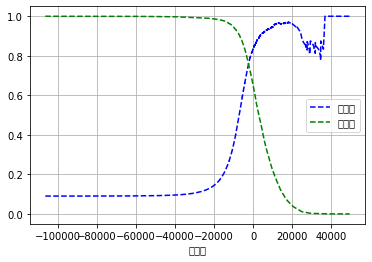

In [57]:
plt.plot(thresholds,precisions[:-1],'b--',label='정밀도')
plt.plot(thresholds,recalls[:-1],'g--',label='재현율') #-1을 해주는 이유는 값의 크기가 달라서 그럼
plt.xlabel('임곗값')
plt.grid()
plt.legend()
plt.show()

No handles with labels found to put in legend.


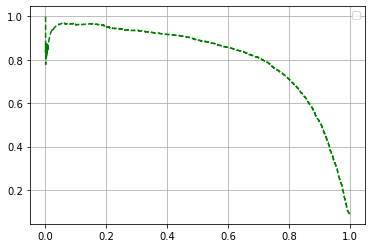

3370.0194991439557


In [67]:
import numpy as np
#좋은 정밀도/재현율 트레이드오프를 선택하는 방법은 재현율에 대한 정밀도 곡선을 그리는 것 이다.

plt.plot(recalls,precisions,'g--')
plt.grid()
plt.legend()
plt.show()

#그래프상 재현율 0.8근처에서 급격하게 정밀도가 줄어들기 시작한다.

#보통은 이 하강점 직전을 정밀도/재현율 트레이드 오프로 선택한다.

#이런 선택은 프로젝트마다 달라진다.

#또한 위의 그래프와 함께 정밀도나 재현율의 그래프 수준을 정하고 그에따른 임계값을 찾으면 된다.

#예를들어 정밀도 90%가 목표라면 임곗값이 약 8,000정도 인데 정확한 인덱스를 반환해보자

threshold_90_precision=thresholds[np.argmax(precisions>=0.90)]
print(threshold_90_precision) #argmax는 처음으로 0.9이상이 나타나는 임계값 인덱스를 반환해준다.